In [3]:
import torch
import matplotlib.pyplot as plt

data_path = r"C:\Users\alexa\Documents\GitHub\DL-CausalSpeechProject\Plots\SNR_SDR"
data_path += r"\metrics632.pt"
save_path = r"C:\Users\alexa\Documents\GitHub\DL-CausalSpeechProject\Plots\SNR_SDR"

metrics = torch.load(data_path)
baseline_metrics = torch.tensor(metrics["baseline_metrics"])
prediction_metrics = torch.tensor(metrics["prediction_metrics"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

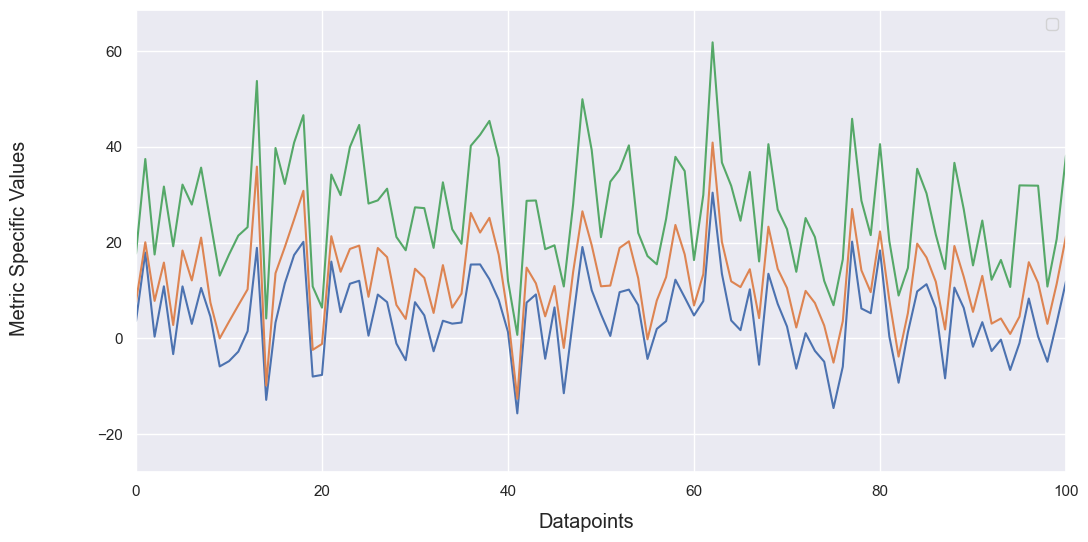

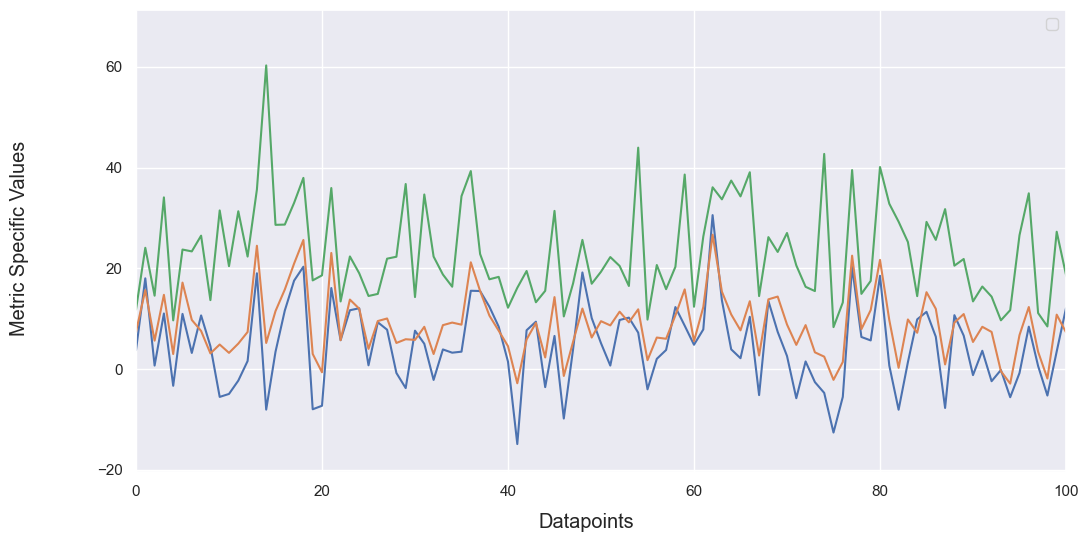

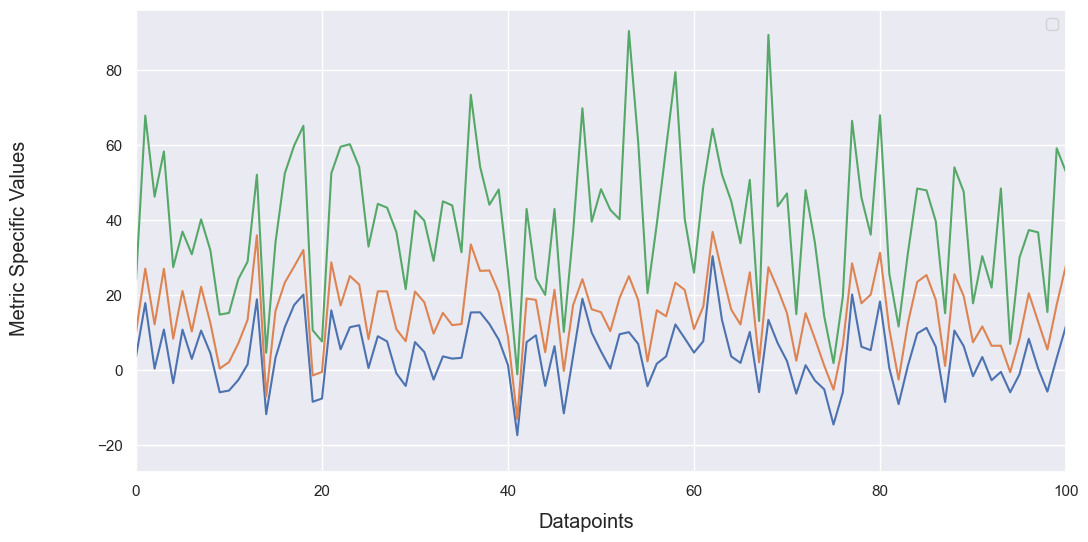

In [ ]:
def plot_metrics(metrics_path, save_path=None):
    import seaborn as sns
    sns.set_theme()
    metric_names = ['SNR', 'SDR', 'SI-SDR'] # CHEKC THAT METRIC AND MODELS ARE CORRECT OR SWITCHED
    model_names = ["student_only_labels", "student_only_teacher", "student_partly_teacher"]
    num_metrics = 3

    metrics = torch.load(metrics_path)
    baseline_metrics = torch.tensor(metrics["baseline_metrics"])
    prediction_metrics = torch.tensor(metrics["prediction_metrics"])
    
    num_models = prediction_metrics.shape[1]
    palette = sns.color_palette("Dark2")

    # for model_idx in range(num_models):
    #     fig, axes = plt.subplots(num_models, 1, constrained_layout=True)
    #     fig.set_size_inches(12, 6)
    #     fig.set_dpi(100)
        
    #     fig.suptitle(f"Metrics | Model: {model_names[model_idx]}")
    #     fig.supxlabel("Datapoints")
    #     fig.supylabel("Metric Specific Values")
        
    #     for metric_idx, ax in enumerate(axes):
    #         ax.set_title(f"{metric_names[metric_idx]} - values")
    #         ax.plot(prediction_metrics[:, :, model_idx][:, metric_idx], color=palette[metric_idx])
        
    #     if save_path:
    #         fig.savefig(save_path+fr"\metrics_model_{model_idx+1}_{model_names[model_idx]}")

    for metric_idx in range(num_metrics):
        # fig, axes = plt.subplots(1, 1, constrained_layout=True)
        fig, ax = plt.subplots()
        fig.set_size_inches(12, 6)
        fig.set_dpi(100)
        
        # fig.suptitle(f"Improvement Metrics | Model: {model_names[model_idx]}")
        fig.supxlabel("Datapoints")
        fig.supylabel("Metric Specific Values")
        
        for model_idx in range(num_metrics):
            # ax.set_title(f"{metric_names[metric_idx]} - improvement values")
            base = baseline_metrics[:, metric_idx]
            pred = prediction_metrics[:, :, model_idx][:, metric_idx]
            improvement = base - pred
            ax.plot(improvement, label=model_names[model_idx])#, color=palette[metric_idx])
            ax.set_xlim(0, 100)
            ax.legend()
        
        if save_path:
            pass
            # fig.savefig(save_path+fr"\improvement_metrics_model_{model_idx+1}_{model_names[model_idx]}")

plot_metrics(data_path, save_path=save_path)